PROBLEM STATEMENT

1. Identify the unique number of high-level classes.
2. Perform the agglomerative clustering
3. Computer the MSE for actual high-level class and predicted ones.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/My Drive/ML_DATASETS/datasets/OSL Datasets/Lesson_5/Datasets/zoo.csv")

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.shape

(101, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Since there are no null values we proceed further

Task 1: Identify the unique classe_types

In [6]:
df['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [7]:
df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

<Axes: xlabel='class_type', ylabel='count'>

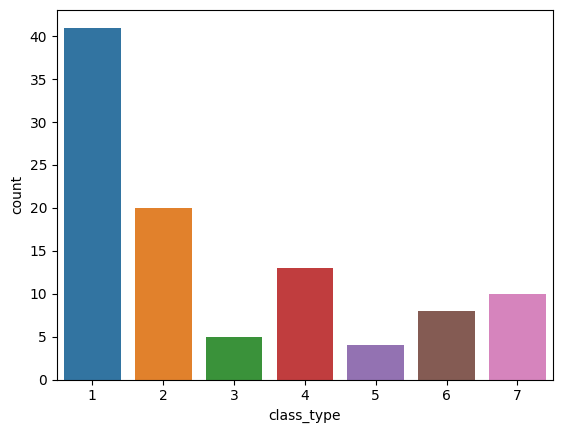

In [8]:
import seaborn as sns
sns.countplot(x = df['class_type'])

Task 2: Perform clustering

In [9]:
features = df.values[:,1:-1]
features.shape

(101, 16)

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters=7,linkage='single',affinity='cosine')

In [12]:
model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='cosine', linkage='single', n_clusters=7)

In [13]:
#Predicted values
model.labels_

array([2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 6, 5, 2, 2, 1, 4, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 4, 2])

In [14]:
import numpy as np
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [15]:
labels = df['class_type']

In [16]:
print(np.unique(labels))

[1 2 3 4 5 6 7]


In [17]:
# therefore
labels = labels-1

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
score = mean_squared_error(labels,model.labels_)

In [20]:
abs_error = np.sqrt(score)

In [21]:
abs_error

2.2449062253011904

STEPS WE HAVE COVERED SO FAR

1. IMPORT REQUIRED LIBRARIES
2. CHECK FOR MISSING VALUES
3. IDENTIFY UNIQUE LABELS AND PLOT THEM
4. EXTRACT FEATURES NECESSARY FOR CLUSTERING WITHIN A SINGLE VARIABLE
5. FIT THE AGGLOMERATIVE CLUSTERING MODEL ON FEATURE DATA
6. PREDICT LABEL FOR EACH ANIMAL
7. PRINT THE 'RMSE' OF THE MODEL

KeyError: ignored

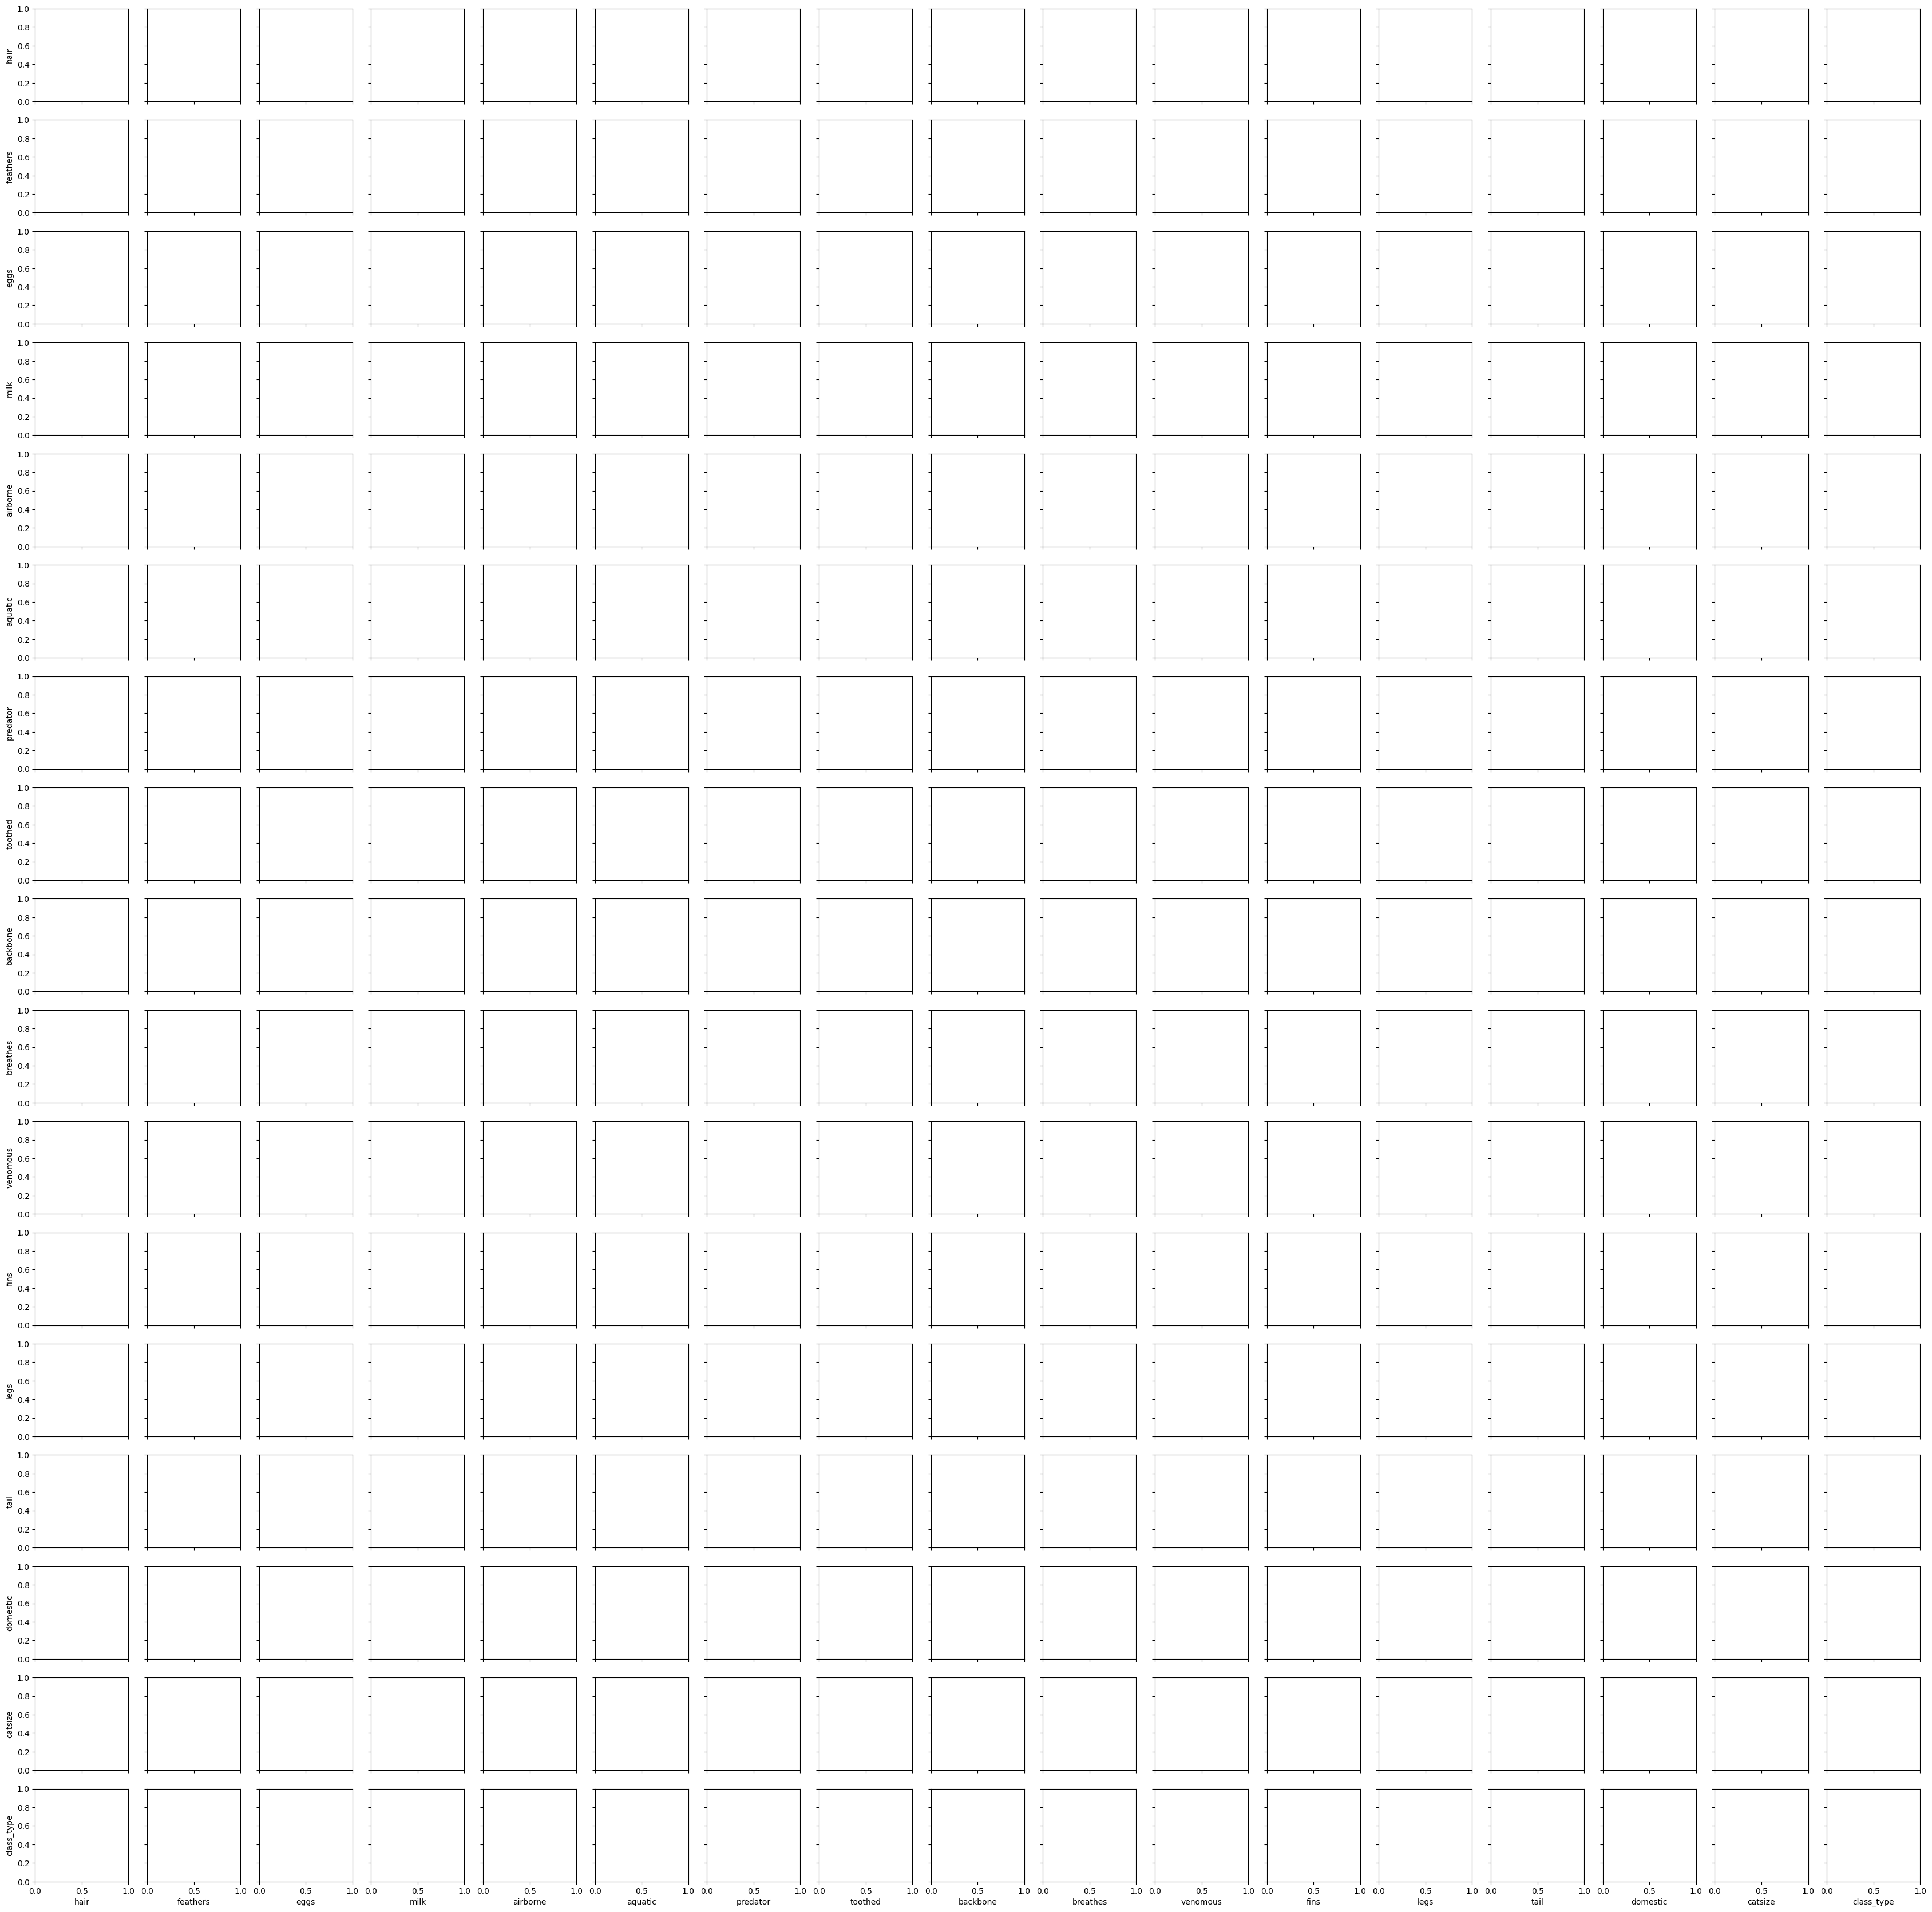

In [ ]:
sns.pairplot(df, hue='model_labels_')
plt.show()